In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 84s 51ms/step - loss: 1.5240 - accuracy: 0.4431 - val_loss: 1.2595 - val_accuracy: 0.5481
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1521 - accuracy: 0.5923 - val_loss: 1.0776 - val_accuracy: 0.6157
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9920 - accuracy: 0.6497 - val_loss: 1.0767 - val_accuracy: 0.6170
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8949 - accuracy: 0.6863 - val_loss: 0.9472 - val_accuracy: 0.6667
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8194 - accuracy: 0.7144 - val_loss: 0.8915 - val_accuracy: 0.6891
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7580 - accuracy: 0.7336 - val_loss: 0.8590 - val_accuracy: 0.7048
Epoch 7/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7060 - accuracy: 0.7523 - val_loss: 0.8654 -

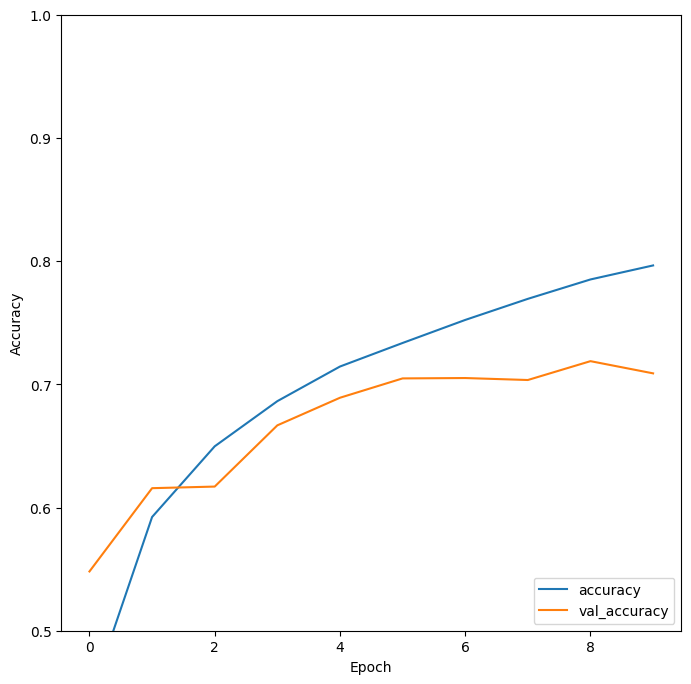

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")

In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

In [11]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0


In [15]:
ann = keras.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 144s 92ms/step - loss: 1.8128 - accuracy: 0.3529
Epoch 2/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.6266 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 137s 88ms/step - loss: 1.5440 - accuracy: 0.4548
Epoch 4/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4813 - accuracy: 0.4787
Epoch 5/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.4341 - accuracy: 0.4952


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 39ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.48      0.55      1000
           1       0.58      0.65      0.61      1000
           2       0.50      0.11      0.18      1000
           3       0.34      0.29      0.31      1000
           4       0.31      0.65      0.42      1000
           5       0.42      0.40      0.41      1000
           6       0.60      0.38      0.46      1000
           7       0.49      0.62      0.55      1000
           8       0.53      0.71      0.61      1000
           9       0.59      0.48      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.46     10000
weighted avg       0.50      0.48      0.46     10000



In [ ]:
cnn = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4542 - accuracy: 0.4819
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1198 - accuracy: 0.6093
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9971 - accuracy: 0.6534
Epoch 4/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9124 - accuracy: 0.6850
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8471 - accuracy: 0.7065
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7909 - accuracy: 0.7248
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7362 - accuracy: 0.7424
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6927 - accuracy: 0.7577
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6518 - accuracy: 0.7707
Epoch 10/10
1563/1563 [==============================] - 68s 43m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9204 - accuracy: 0.7002


[0.9204291701316833, 0.7002000212669373]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[7.0351287e-04, 1.1829986e-04, 9.0641305e-03, 5.3875303e-01,
        1.6561977e-03, 1.3890879e-01, 3.0890858e-01, 7.1873576e-05,
        1.1509103e-03, 6.6461641e-04],
       [1.6930250e-03, 1.3609172e-01, 6.0545773e-07, 2.9364847e-07,
        5.7720686e-09, 7.2509443e-10, 3.4714024e-08, 1.0446380e-09,
        8.6218590e-01, 2.8464916e-05],
       [6.2787212e-02, 4.7181487e-01, 1.4874203e-03, 1.3152031e-03,
        7.8712712e-04, 7.2180126e-05, 9.5341573e-05, 1.1387736e-03,
        4.5048764e-01, 1.0014340e-02],
       [9.5438123e-01, 5.8616097e-03, 6.5324069e-03, 4.1352853e-04,
        5.1549217e-03, 3.7205589e-06, 6.6018559e-04, 2.2938832e-05,
        2.6948994e-02, 2.0369616e-05],
       [5.6110080e-06, 1.0066112e-05, 9.8092956e-03, 2.5507042e-02,
        7.7568322e-01, 3.0708634e-03, 1.8588632e-01, 5.7604002e-06,
        2.1616206e-05, 2.0856911e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 1, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

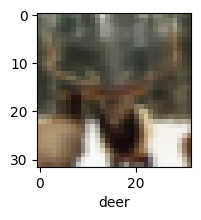

In [ ]:
plot_sample(X_test, y_test,26)

In [ ]:
classes[y_classes[26]]

'deer'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
num_epochs = 10
model.fit(train_images, train_labels, epochs=num_epochs, validation_split=0.2)


Epoch 1/10
1250/1250 [==============================] - 70s 54ms/step - loss: 1.5023 - accuracy: 0.4540 - val_loss: 1.2546 - val_accuracy: 0.5517
Epoch 2/10
1250/1250 [==============================] - 66s 53ms/step - loss: 1.1028 - accuracy: 0.6085 - val_loss: 1.0082 - val_accuracy: 0.6471
Epoch 3/10
1250/1250 [==============================] - 69s 55ms/step - loss: 0.9292 - accuracy: 0.6738 - val_loss: 0.9526 - val_accuracy: 0.6749
Epoch 4/10
1250/1250 [==============================] - 65s 52ms/step - loss: 0.8138 - accuracy: 0.7125 - val_loss: 0.9202 - val_accuracy: 0.6830
Epoch 5/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.7186 - accuracy: 0.7479 - val_loss: 0.8599 - val_accuracy: 0.7070
Epoch 6/10
1250/1250 [==============================] - 70s 56ms/step - loss: 0.6336 - accuracy: 0.7758 - val_loss: 0.8331 - val_accuracy: 0.7218
Epoch 7/10
1250/1250 [==============================] - 67s 53ms/step - loss: 0.5611 - accuracy: 0.8004 - val_loss: 0.8980 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 6s - loss: 1.0511 - accuracy: 0.7068 - 6s/epoch - 19ms/step

Test accuracy: 0.7067999839782715


In [ ]:
model.path = 'mlproject.h5'
model.save(model.path)
print('Model Path:', model.path)

Model Path: mlproject.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = keras.models.load_model('mlproject.h5')
class_labels = {0: 'Cat', 1: 'Dog', 2 : 'Bear', 3 : 'Deer'}




1/1 [==============================] - 1s 862ms/step


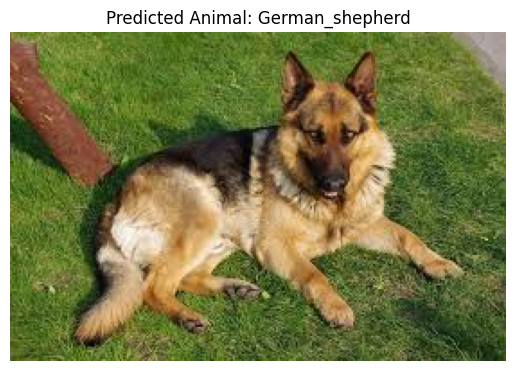

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

model = keras.applications.MobileNetV2(weights="imagenet", include_top=True)

def predict_and_display_animal_image(image_path):
    try:

        img = keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = keras.applications.mobilenet_v2.preprocess_input(img_array)

        predictions = model.predict(img_array)
        decoded_predictions = keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0]

        predicted_name = decoded_predictions[0][1]

        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis('off')


        plt.title(f'Predicted Animal: {predicted_name}')
        plt.show()

    except Exception as e:
        print(f"Error: {e}")

image_path = '/content/drive/MyDrive/german.jpg'

predict_and_display_animal_image(image_path)
